In [754]:
import matplotlib.pyplot as plt
import numpy as np
from SecondaryValue import SecondaryValue
from importlib import reload
import utility
reload(utility)
from utility import *
from scipy.optimize import curve_fit
import scipy.constants as const
%matplotlib inline


In [755]:
e_cs_1 = (32.194*3.64 + 31.817*1.99)/(3.64+1.99)  # keV
e_ba_1 = (30.625*33.9 + 30.973*62.2)/(62.2 + 33.9)  # keV
e_ba_2 = (79.6142*2.65 + 80.9979*32.9)/(2.65 + 32.9)  # keV
e_ba_3 = 53.1622  # keV
e_am_1 = 26.3446  # keV
e_am_2 = 59.5409  # keV

e_eu_1 = (5.65*14 + 5.06*0.174)/(14+.174)
energies = [e_cs_1, e_ba_1, e_ba_2, e_ba_3, e_am_1, e_am_2, e_eu_1]


In [756]:
cal_cs = load_spectrum('../messung/cal/cs137.dat')
cal_ba = load_spectrum('../messung/cal/ba133.dat')
cal_am = load_spectrum('../messung/cal/am241.dat')
cal_eu = load_spectrum('../messung/cal/eu152.dat')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f31d2799310>)

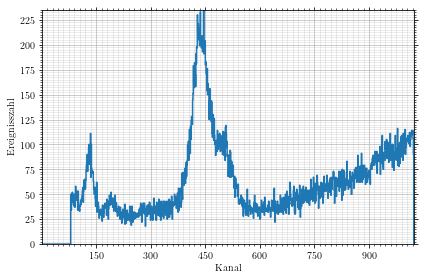

In [757]:
plot_spec(cal_eu)

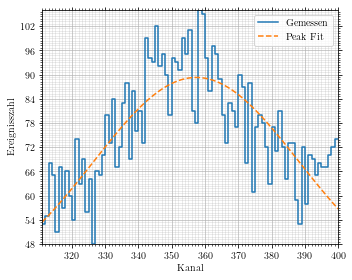

In [758]:
p_cs_1, d_p_cs_1 = calibrate_peak(cal_cs, 310, 400, save=('cs', 'calibrate'))

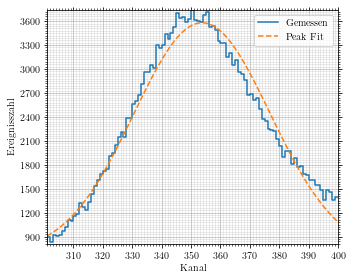

In [759]:
p_ba_1, d_p_ba_1 = calibrate_peak(cal_ba, 300, 400, save=('ba_1', 'calibrate'))

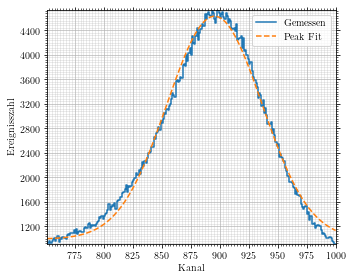

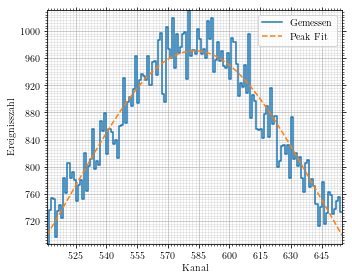

In [760]:
p_ba_2, d_p_ba_2 = calibrate_peak(cal_ba, 750, 1000, save=('ba_2', 'calibrate'))
p_ba_3, d_p_ba_3 = calibrate_peak(cal_ba, 510, 655, save=('ba_3', 'calibrate'))

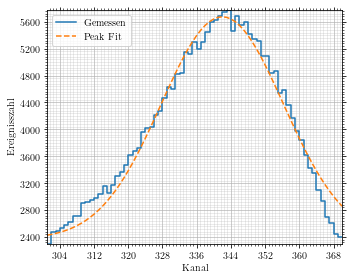

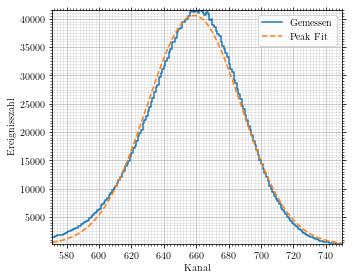

In [761]:
p_am_1, d_p_am_1 = calibrate_peak(cal_am, 300, 370, save=('am_1', 'calibrate'))
p_am_2, d_p_am_2 = calibrate_peak(cal_am, 570, 750, save=('am_2', 'calibrate'))

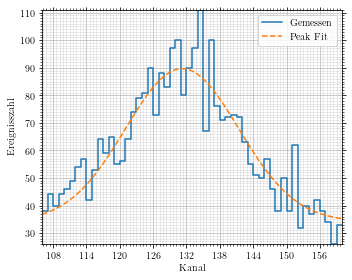

In [762]:
p_eu_1, d_p_eu_1 = calibrate_peak(cal_eu, 105, 160, save=('eu_1', 'calibrate'))

In [763]:
peaks, d_peaks = [p_ba_1, p_ba_2, p_am_1, p_am_2, p_eu_1], [d_p_ba_1, d_p_ba_2, d_p_am_1, d_p_am_2, d_p_eu_1]

In [764]:
peaks, d_peaks = [p_cs_1, p_ba_1, p_ba_2, p_ba_3, p_am_1, p_am_2, p_eu_1], \
    [d_p_cs_1, d_p_ba_1, d_p_ba_2, d_p_ba_3, d_p_am_1, d_p_am_2, d_p_eu_1]

In [765]:
d_peaks

[10.795145334120809,
 0.9345068181899046,
 0.591735575640896,
 9.396032469152779,
 0.7153363502952073,
 0.4132431699335809,
 1.3554873053001755]

In [766]:
def Ef(x, a, b):
    return (x - a)/b
    

In [767]:
pe, d_pe = curve_fit(Ef, energies, peaks, sigma=d_peaks, absolute_sigma=True)
d_pe =  np.sqrt(np.diag(d_pe))

array([0.08314713, 0.00012808])

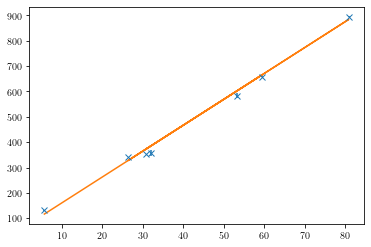

In [768]:
plt.cla()
plt.errorbar(energies, peaks, linestyle='None', marker='x', yerr=d_peaks)
plt.plot(energies, Ef(np.array(energies), *pe))
d_pe

In [769]:
EE = SecondaryValue('b*K+a', defaults=dict(a=(pe[0], d_pe[0]), b=(pe[1], d_pe[1])))

In [770]:
am_2 = load_spectrum('../messung/2/2_90.dat', absolute=True)
am_2_0 = load_spectrum('../messung/2/3_90_0.dat', absolute=True)

91.0

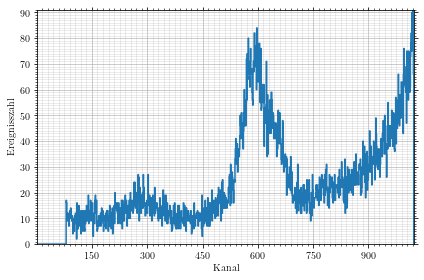

In [697]:
plot_spec(am_2)
am_2.max()

In [698]:
t = (1200 + 1165.2)/2
N = am_2[530:780].sum()/t
N0 = am_2_0[530:780].sum()/t


In [699]:
tt = t_opt(N_g=N, N_0=N0, prec=([.05, .03],))
d_tt = d_t_opt(N_g=N, N_0=N0, prec=([.05, .03],), t=t)

In [700]:
tt/60


array([ 7.84406946, 21.78908184])

In [701]:
p_am_2

658.6823194735251

In [702]:
N0

4.683747674615255

In [703]:
d_tt/60

array([1.5808687 , 4.39130194])

In [704]:
am_2_0[530:780].sum()

5539.0

# E(mu)

In [705]:
deg_angles = np.array([30, 45, 60, 75, 90, 105, 120])
angles = np.array([30, 45, 60, 75, 90, 105, 120])*np.pi/180
e_ref, deps = E(E_in=e_am_2, theta=(angles,), retdeps=True)
mus = deps['mu'][0]

In [706]:
deps

{'mu': ((array([ 8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
           6.12323400e-17, -2.58819045e-01, -5.00000000e-01]),), {}),
 'kappa': ((0.116518634725179,), {})}

In [708]:
e_am_1*1e3

26344.6

In [709]:
e_ref

array([58.62572101, 57.57597488, 56.26305294, 54.80763619, 53.32727833,
       51.92478644, 50.68268424])

In [710]:
a_30 = load_spectrum('../messung/angles/4_30.SPC.dat', absolute=True)
a_30_0 = load_spectrum('../messung/angles/4_30_null.SPC.dat', absolute=True)

(644.1816331253826, 2.159265086725292)

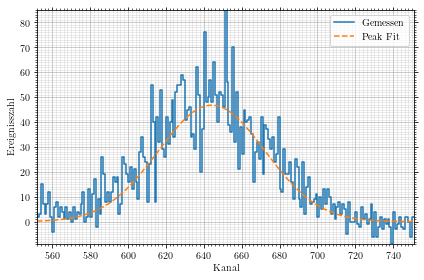

In [772]:
find_peak(a_30, a_30_0, [450, 800], 100)

In [773]:
angle_specs = np.array([[load_spectrum(f'../messung/angles/4_{i}.SPC.dat', absolute=True) for i in deg_angles], [load_spectrum(f'../messung/angles/4_{i}_null.SPC.dat', absolute=True) for i in deg_angles]])

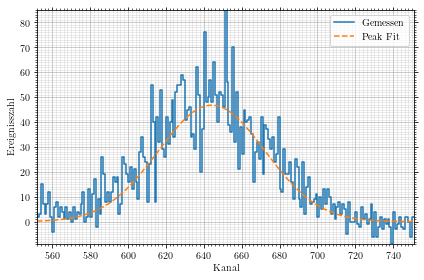

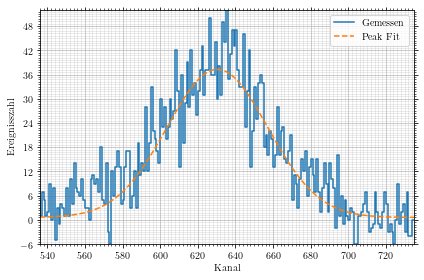

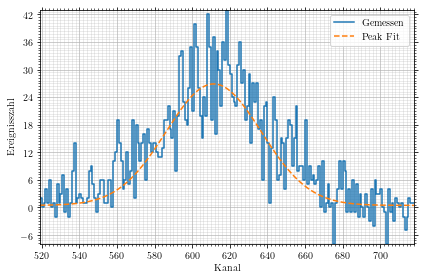

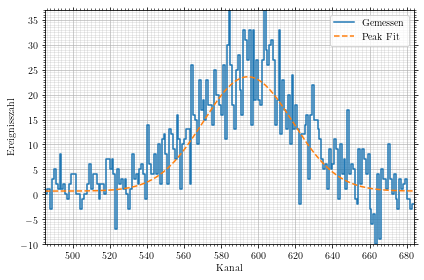

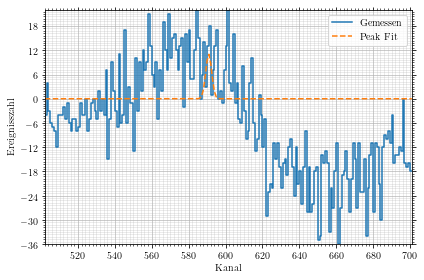

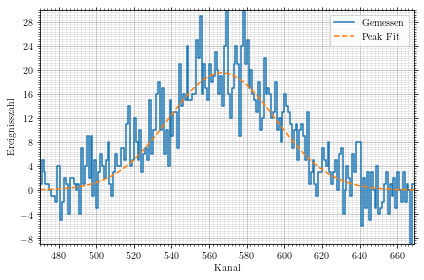

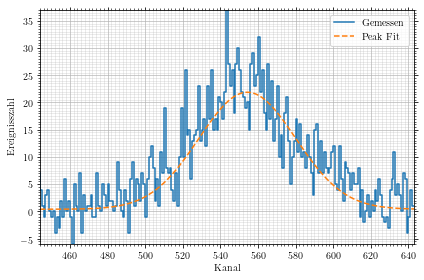

In [774]:
peaks = np.array([np.array(find_peak(angle_specs[0][i], angle_specs[1][i], [450, 800], 100)) for i in range(angle_specs.shape[1])])

In [775]:
angle_energies = peaks

In [776]:
angle_energies = EE(K=(peaks[:,0],peaks[:,1]))

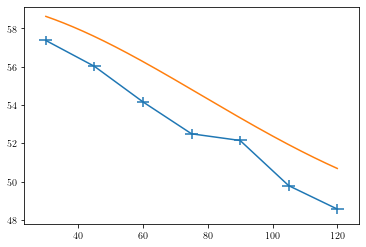

In [777]:
plt.clf()
plt.errorbar(deg_angles, angle_energies[0], xerr=2, yerr=angle_energies[1])
smooth = np.linspace(angles[0], angles[-1], 1000)
plt.plot(smooth*180/np.pi,E(E_in=e_am_2, theta=[smooth,1])[0])

In [778]:
peaks[:,1]

array([2.15926509, 2.11879751, 2.411109  , 2.56150105, 1.87911262,
       2.54988501, 2.41494428])

In [779]:
angle_energies


(array([57.36744811, 56.01620168, 54.15802041, 52.4916951 , 52.14307656,
        49.78330525, 48.56060084]),
 array([0.24192842, 0.23785995, 0.26252044, 0.2752597 , 0.21581615,
        0.27325993, 0.26077371]))

In [719]:
E(E_in=e_am_2, theta=angles[6])

50.68268424189124

In [720]:
E(E_in=e_am_2, theta=angles[6])

50.68268424189124

In [721]:
E(E_in=e_am_2, theta=(np.array([1,2]),2/180*np.pi))

(array([56.51383007, 51.10773983]), array([0.18358449, 0.16224326]))

In [722]:
d_pe


array([2.84522543e-02, 4.76448414e-05])